## Support Vector Machine

### Linear X Não linear 

### Vantagens

- Não é muito influenciado por ruídos nos dados
- Utilizado para **classificação** e **regressão**
- Aprende conceitos não presenets nos dados originais
- Mais fácil que redes neurais

### Desvantagens

- Testar várias combinações e parâmetros
- Lento, custoso computacionalmente
- _Black Box_


In [2]:
import pandas as pd
import plotly.express  as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
from sklearn import svm

with open('../datasets/credit.pkl', 'rb') as f:
    X_credit_train, y_credit_train, X_credit_test, y_credit_test = pickle.load(f)

# Cria uma instância do classificador SVM
svm_credit = svm.SVC()

# Define os hiperparâmetros para testar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(estimator=svm_credit, param_grid=param_grid, cv=5)

# Treina o modelo com o Grid Search
grid_search.fit(X_credit_train, y_credit_train)

# Obtem os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Imprime os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(best_params)

Melhores hiperparâmetros encontrados:
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [4]:
svm_credit = svm.SVC(C=100, gamma='auto', kernel='rbf')
svm_credit.fit(X_credit_train, y_credit_train)
svm_predict = svm_credit.predict(X_credit_test)

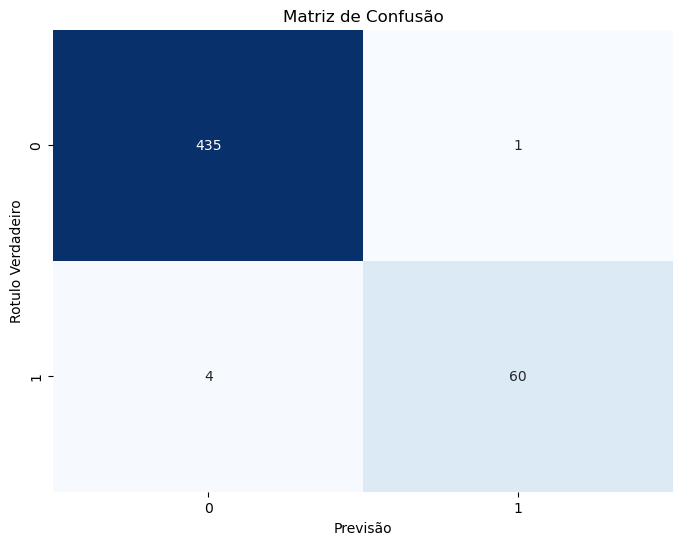

In [6]:
y_true = y_credit_test # Rótulos verdadeiros
y_pred = svm_predict  # Previsões do modelo

# Calcula a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plota a matriz de confusão como um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Rotulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [10]:
print(classification_report(y_credit_test, svm_predict))
print(accuracy_score(y_credit_test, svm_predict))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.98      0.94      0.96        64

    accuracy                           0.99       500
   macro avg       0.99      0.97      0.98       500
weighted avg       0.99      0.99      0.99       500

0.99


# Sample Complexity 

Nas células abaixo, foi criada uma curva de complexidade de amostra para o modelo SVM criado anteriormente. A curva de complexidade de amostra nos ajuda a entender como o tamanho do conjunto de treinamento afeta o desempenho do modelo.

In [12]:
def train_predictSVM(X_credit_train, y_credit_train):
    svm_credit = svm.SVC(C=100, gamma='auto', kernel='rbf')
    svm_credit.fit(X_credit_train, y_credit_train)
    svm_predict = svm_credit.predict(X_credit_test)
    acc = accuracy_score(y_credit_test, svm_predict)
    return acc

num_samples = list(range(100, 1500, 100))  # Cria uma lista começando em 100, terminando em 1400, aumentando de 100 em 100

accs = []

for i in range(len(num_samples)):
    print(f'\nTraining with {num_samples[i]} samples...')
    accs.append(train_predictSVM(X_credit_train[:num_samples[i]], y_credit_train[:num_samples[i]]))
    print(f' Accuracy is {accs[i]}')


Training with 100 samples...
 Accuracy is 0.968

Training with 200 samples...
 Accuracy is 0.98

Training with 300 samples...
 Accuracy is 0.982

Training with 400 samples...
 Accuracy is 0.986

Training with 500 samples...
 Accuracy is 0.98

Training with 600 samples...
 Accuracy is 0.984

Training with 700 samples...
 Accuracy is 0.988

Training with 800 samples...
 Accuracy is 0.99

Training with 900 samples...
 Accuracy is 0.992

Training with 1000 samples...
 Accuracy is 0.99

Training with 1100 samples...
 Accuracy is 0.992

Training with 1200 samples...
 Accuracy is 0.992

Training with 1300 samples...
 Accuracy is 0.992

Training with 1400 samples...
 Accuracy is 0.992


Text(0, 0.5, 'Test Accuracy')

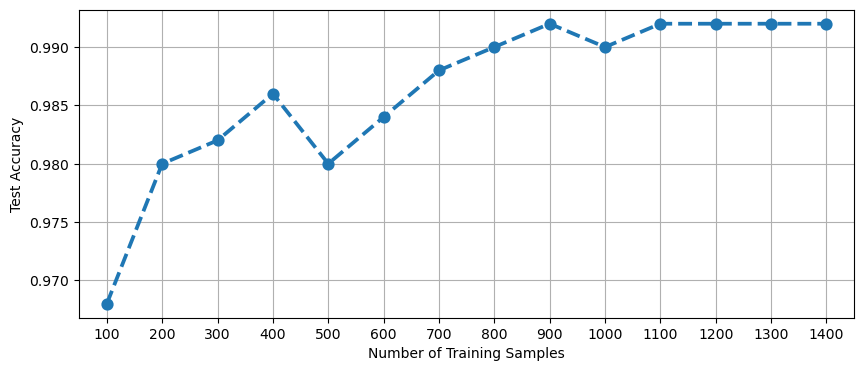

In [13]:
plt.figure(figsize=(10, 4))
sn.pointplot(x=num_samples, y=accs, linestyles='--')
plt.grid(True)
plt.xlabel('Number of Training Samples')
plt.ylabel('Test Accuracy')

### Referências complementares

[An Introduction to Support Vector Machines de Nello Cristiani e John Shawe-Taylor](https://www.amazon.com.br/Introduction-Support-Machines-Kernel-based-Learning-ebook/dp/B00AKE1PR8)
